In [124]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as smd
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [125]:
df=pd.read_csv("Test.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [126]:
df.shape

(2627, 11)

In [127]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [128]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [129]:
df = df.drop(['ID','Ever_Married','Graduated','Profession','Var_1'],axis=1)
df

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Female,36,0.0,Low,1.0,B
1,Male,37,8.0,Average,4.0,A
2,Female,69,0.0,Low,1.0,A
3,Male,59,11.0,High,2.0,B
4,Female,19,NaN,Low,4.0,A
...,...,...,...,...,...,...
2622,Male,29,9.0,Low,4.0,B
2623,Female,35,1.0,Low,1.0,A
2624,Female,53,NaN,Low,2.0,C
2625,Male,47,1.0,High,5.0,C


In [130]:
df.columns

Index(['Gender', 'Age', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Segmentation'],
      dtype='object')

In [131]:
df['Work_Experience'].unique()

array([ 0.,  8., 11., nan,  5.,  1.,  2.,  9.,  3.,  6.,  7.,  4., 13.,
       10., 12., 14.])

In [132]:
avg_1 = df['Work_Experience'].mean(axis=0)
df['Work_Experience'].replace(np.nan, avg_1, inplace = True)

In [133]:
df['Work_Experience'].unique()

array([ 0.        ,  8.        , 11.        ,  2.55258694,  5.        ,
        1.        ,  2.        ,  9.        ,  3.        ,  6.        ,
        7.        ,  4.        , 13.        , 10.        , 12.        ,
       14.        ])

In [134]:
avg_2 = df['Family_Size'].mean(axis=0)
df['Family_Size'].replace(np.nan, avg_2, inplace = True)

In [135]:
df['Family_Size'].unique()

array([1.        , 4.        , 2.        , 5.        , 3.        ,
       6.        , 2.82537788, 8.        , 7.        , 9.        ])

In [136]:
df

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Female,36,0.000000,Low,1.0,B
1,Male,37,8.000000,Average,4.0,A
2,Female,69,0.000000,Low,1.0,A
3,Male,59,11.000000,High,2.0,B
4,Female,19,2.552587,Low,4.0,A
...,...,...,...,...,...,...
2622,Male,29,9.000000,Low,4.0,B
2623,Female,35,1.000000,Low,1.0,A
2624,Female,53,2.552587,Low,2.0,C
2625,Male,47,1.000000,High,5.0,C


In [137]:
df.isnull().sum()

Gender             0
Age                0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [138]:
df.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.165346,1.518149
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.825378
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


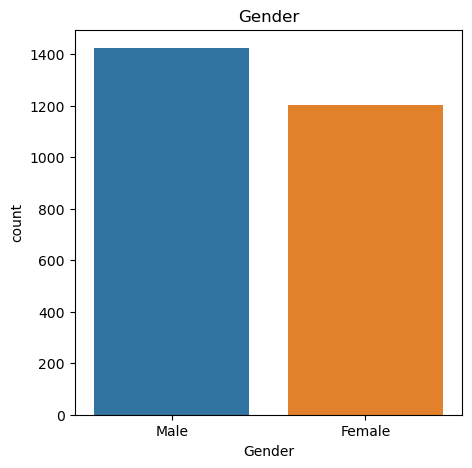

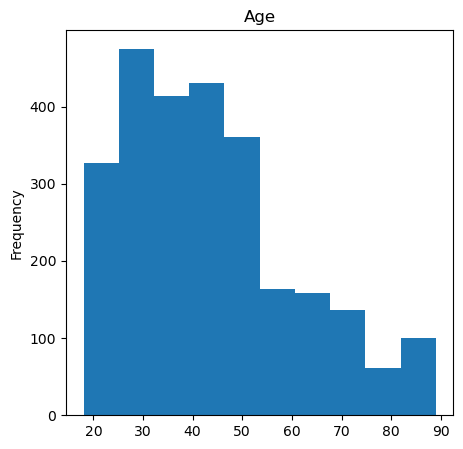

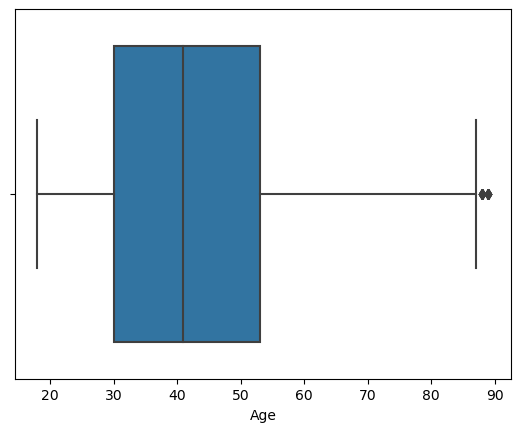

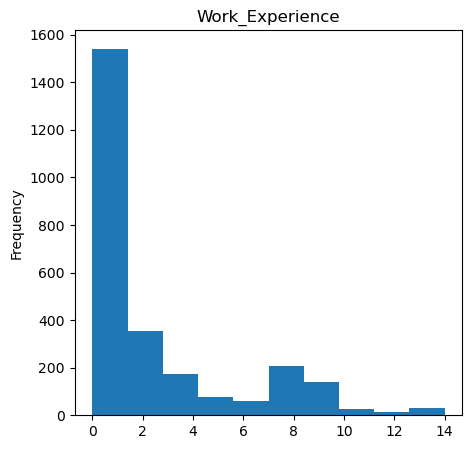

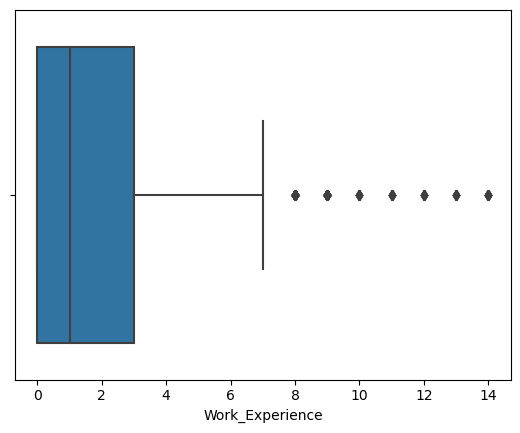

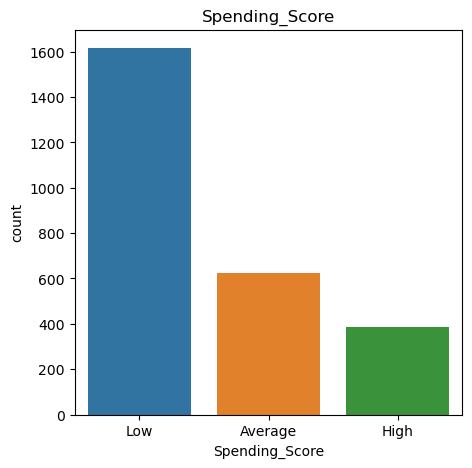

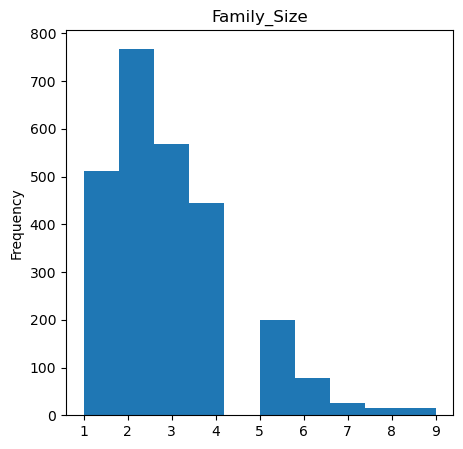

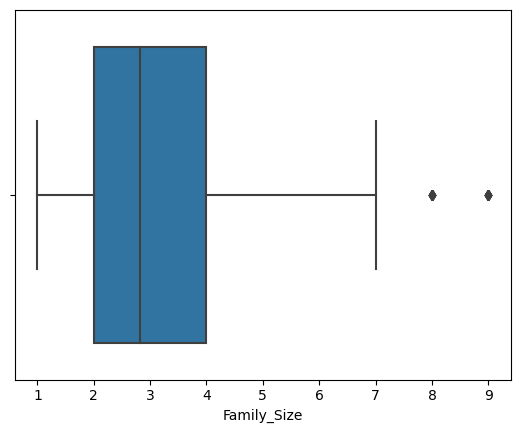

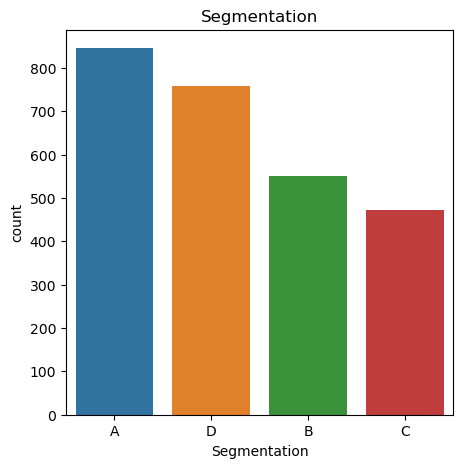

In [139]:
for col in df.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(df[col]):
        df[col].plot(kind="hist")
        plt.show()
        sns.boxplot(data=df, x=col)    
    if is_string_dtype(df[col]):
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.show()

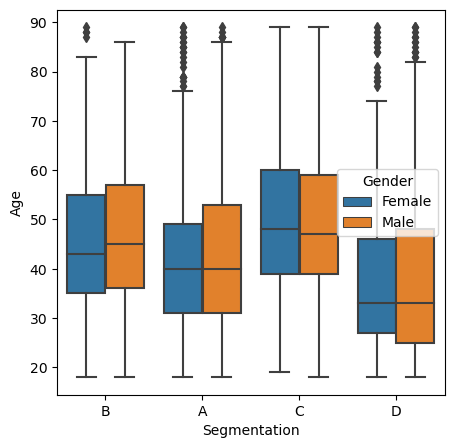

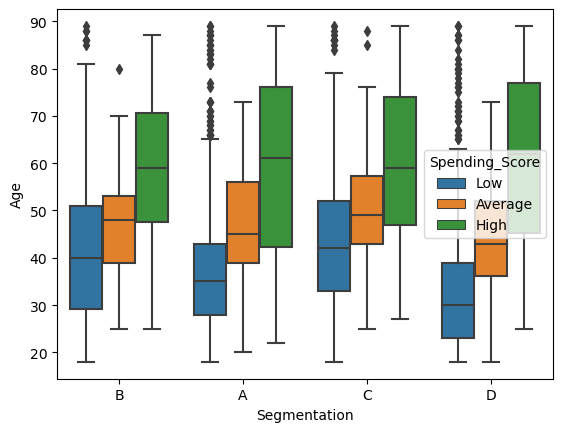

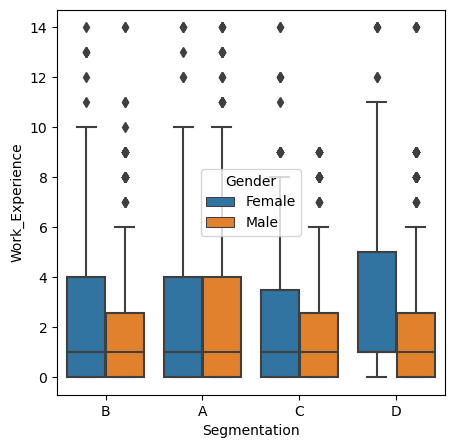

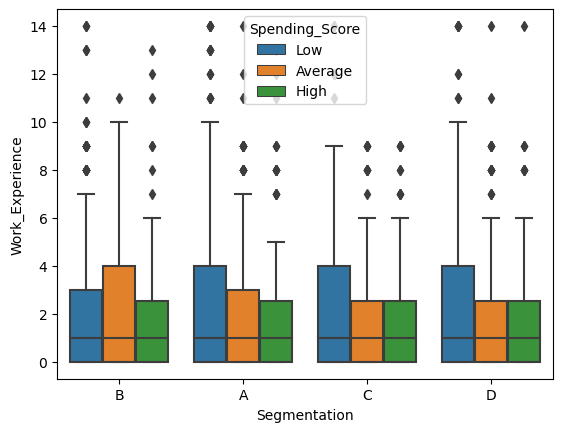

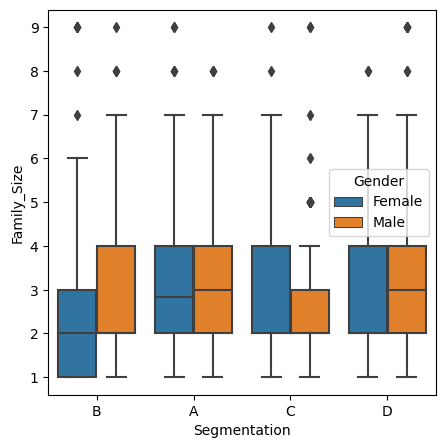

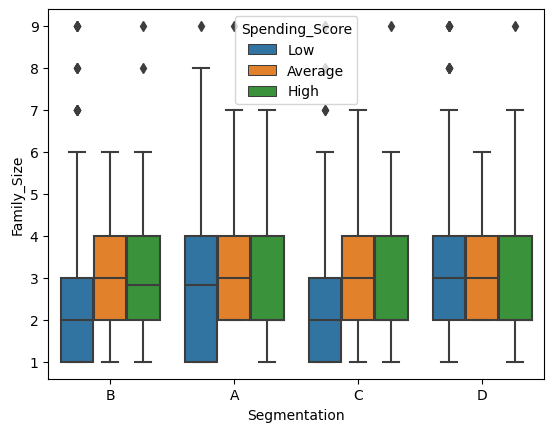

In [140]:
for ycolumns in ['Age','Work_Experience','Family_Size']:
    plt.figure(ycolumns, figsize=(5,5))
    for hcolumns in ['Gender','Spending_Score',]:
        sns.boxplot(data=df, x="Segmentation", y=ycolumns, hue=hcolumns)
        plt.show()

In [143]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Spending_Score'] = lb.fit_transform(df['Spending_Score'])
df['Family_Size'] = lb.fit_transform(df['Family_Size'])
df['Work_Experience'] = lb.fit_transform(df['Work_Experience'])
df['Segmentation'] = lb.fit_transform(df['Segmentation'])


In [144]:
df.head()

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,36,0,2,0,1
1,1,37,9,0,4,0
2,0,69,0,2,0,0
3,1,59,12,1,1,1
4,0,19,3,2,4,0


In [145]:
cor = df.corr()
cor

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
Gender,1.000000,0.010165,-0.067933,-0.041855,0.075074,-0.003860
Age,0.010165,1.000000,-0.176732,-0.284426,-0.297661,-0.078762
Work_Experience,-0.067933,-0.176732,1.000000,0.066382,-0.071166,-0.015461
Spending_Score,-0.041855,-0.284426,0.066382,1.000000,-0.101055,0.041534
Family_Size,0.075074,-0.297661,-0.071166,-0.101055,1.000000,0.022221
Segmentation,-0.003860,-0.078762,-0.015461,0.041534,0.022221,1.000000


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.08798318, -0.45094833, -0.80846986,  0.73869072, -1.19045196,
        -0.35944958],
       [ 0.91913186, -0.39199923,  1.7215967 , -1.6336082 ,  0.87753766,
        -1.18486395],
       [-1.08798318,  1.49437223, -0.80846986,  0.73869072, -1.19045196,
        -1.18486395],
       ...,
       [-1.08798318,  0.5511865 ,  0.03488566,  0.73869072, -0.67345456,
         0.4659648 ],
       [ 0.91913186,  0.19749185, -0.52735135, -0.44745874,  1.39453506,
         0.4659648 ],
       [-1.08798318, -0.03830458,  2.00271521,  0.73869072,  0.36054025,
        -1.18486395]])

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [148]:
km_inertias, km_scores = [], []
for k in range(2, 10):
    km = KMeans(n_clusters=k).fit(df)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(df, km.labels_))
    print(f" k = {k}, Intertia = {km.inertia_}, Silhoutte_score = {silhouette_score(df, km.labels_)}")

 k = 2, Intertia = 291248.38649852446, Silhoutte_score = 0.5355512876387899
 k = 3, Intertia = 155851.01413998834, Silhoutte_score = 0.46731480759050376
 k = 4, Intertia = 109293.46545994123, Silhoutte_score = 0.4165896514967159
 k = 5, Intertia = 86167.57738618419, Silhoutte_score = 0.39855735758819616
 k = 6, Intertia = 72915.86229146997, Silhoutte_score = 0.35951491277489833
 k = 7, Intertia = 63184.33546357595, Silhoutte_score = 0.3529252541722291
 k = 8, Intertia = 53876.93978676181, Silhoutte_score = 0.36600173800447017
 k = 9, Intertia = 45936.78858435563, Silhoutte_score = 0.38889933423916684


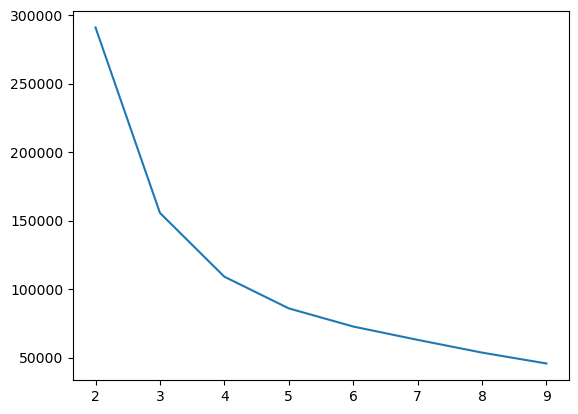

In [149]:
sns.lineplot(range(2, 10), km_inertias)
plt.show()

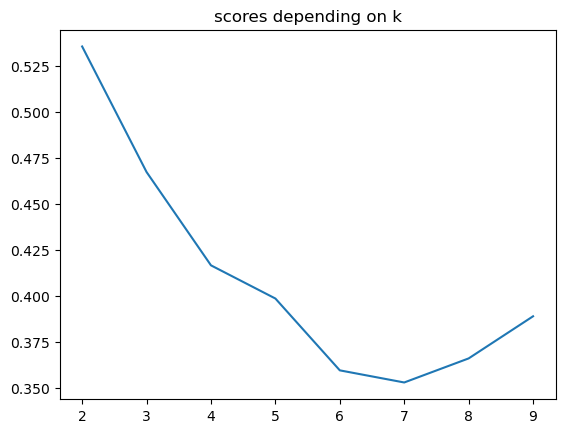

In [150]:
sns.lineplot(range(2, 10), km_scores)
plt.title('scores depending on k')
plt.show()

In [151]:
km = KMeans(n_clusters=5).fit(df)

In [152]:
df

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,36,0,2,0,1
1,1,37,9,0,4,0
2,0,69,0,2,0,0
3,1,59,12,1,1,1
4,0,19,3,2,4,0
...,...,...,...,...,...,...
2622,1,29,10,2,4,1
2623,0,35,1,2,0,0
2624,0,53,3,2,1,2
2625,1,47,1,1,5,2


In [153]:
df['Label'] = km.labels_
df

,Gender,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Label
0,0,36,0,2,0,1,0
1,1,37,9,0,4,0,0
2,0,69,0,2,0,0,1
3,1,59,12,1,1,1,1
4,0,19,3,2,4,0,2
...,...,...,...,...,...,...,...
2622,1,29,10,2,4,1,2
2623,0,35,1,2,0,0,0
2624,0,53,3,2,1,2,4
2625,1,47,1,1,5,2,4


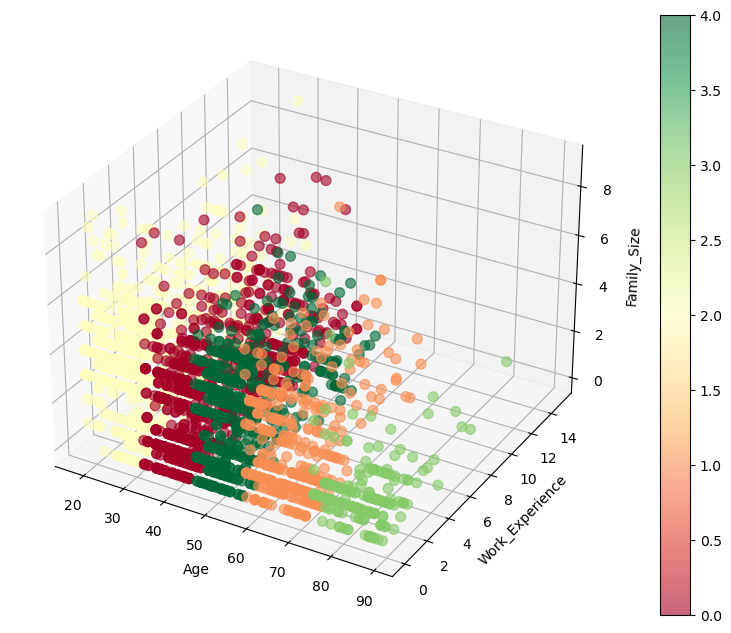

In [154]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
xs = df['Age']
ys = df['Work_Experience']
zs = df['Family_Size']
im = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='RdYlGn')
fig.colorbar(im, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Work_Experience')
ax.set_zlabel('Family_Size')
plt.show()

In [155]:
for k in range(5):
    print(f'Cluster nb : {k}')
    print(df[df.Label == k].describe().iloc[:, 1:-1])
    print('\n')

Cluster nb : 0
              Age  Work_Experience  Spending_Score  Family_Size  Segmentation
count  774.000000       774.000000      774.000000   774.000000    774.000000
mean    38.152455         4.003876        1.351421     1.976744      1.289406
std      3.366760         4.092240        0.891540     1.873621      1.203258
min     31.000000         0.000000        0.000000     0.000000      0.000000
25%     36.000000         1.000000        0.000000     0.000000      0.000000
50%     38.000000         3.000000        2.000000     1.000000      1.000000
75%     41.000000         8.000000        2.000000     3.000000      2.000000
max     43.000000        15.000000        2.000000     9.000000      3.000000


Cluster nb : 1
              Age  Work_Experience  Spending_Score  Family_Size  Segmentation
count  368.000000       368.000000      368.000000   368.000000    368.000000
mean    63.790761         1.812500        1.010870     1.866848      1.345109
std      4.619261         2.5530